In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, ensemble, svm, tree, neural_network

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

import warnings
warnings.filterwarnings("ignore")

In [2]:
result = {}

Start :: Process on household 86...
(8285,)
0.97705
(8285, 173)
[48.71        0.          1.          1.         20.          1.27583333
  1.47873333  1.13071667  1.17716667  0.95553333  1.01835     1.67695
  1.47065     1.42105     1.44836667  1.34463333  0.94916667  1.40671667
  0.59123333  0.32915     0.30205     0.30861667  0.3122      0.43771667
  0.32645     0.4304      0.45403333  1.0689      1.14498333  1.16833333
  1.21855     1.10318333  1.2341      0.8834      0.86148333  1.75813333
  1.77588333  1.83318333  1.81648333  1.2819      0.72991667  1.3445
  0.65178333  0.295       0.37415     0.28705     0.35743333  0.34881667
  0.33831667  0.24241667  0.47081667  1.11895     1.6979      1.4683
  1.16453333  1.05345     1.09245     0.88378333  1.22613333  1.73395
  2.01853333  1.95833333  1.89086667  1.6949      1.51768333  1.46271667
  0.51226667  0.40383333  0.37136667  0.42911667  0.47105     0.33753333
  0.44091667  0.33223333  0.36715     0.57771667  1.20361667  1.29413333
 

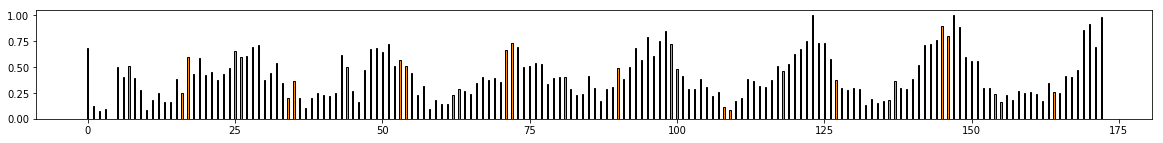

In [5]:
#hhids=[86, 59, 77, 26, 93, 101, 114, 171, 1086, 1403]
#hhids=[26, 59, 77, 86, 93, 94, 101, 114, 171, 187]
hhids=[86]
for hhid in hhids: 
    X=[]
    result[hhid] = []
    print('Start :: Process on household {}...'.format(hhid))
    df = pd.read_csv('data_filled2/processed_hhdata_{}_2.csv'.format(hhid), index_col=0)

    features = [ 'temperature', 'cloud_cover','is_weekday','month','hour']
    
    Y = list(df.use)[500:]
    Y = np.array(Y)
    print(Y.shape)
    print(Y[0])
    
    #get X
    for index, row in df.iterrows():
        if index>=500:
            rowlist=row[features]
            rowlist = rowlist.tolist()
            X.append(rowlist)
            for i in range(1,169):
                rowlist.append(df.use.iloc[index-i])
                
             
    #X = df[features]
    X = np.array(X)
    print(X.shape)
    print(X[0])
    print(len(X[0]))


    # Create an SelectKBest object to select features with two best ANOVA F-Values
    fvalue_selector = SelectKBest(f_classif, k=1)

    # Apply the SelectKBest object to the features and target
    X_kbest = fvalue_selector.fit_transform(X, Y)
    
    # Show results
    print(X_kbest[0])
    cols = fvalue_selector.get_support(indices=True)
    print(cols)
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_kbest.shape[1])

    # #############################################################################
    # Univariate feature selection with F-test for feature scoring
    # We use the default selection function: the 10% most significant features
    X_indices = np.arange(X.shape[-1])
    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(X, Y)
    scores = -np.log10(selector.pvalues_)
    scores /= scores.max()
    plt.figure(figsize=(20,2))
    plt.bar(X_indices, scores, width=.2,
            label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
            edgecolor='black')


#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
#                                                         test_size=0.10,
#                                                         random_state=666)


#     classifiers = [
#         linear_model.Ridge(alpha=1.0, random_state=0),
#         linear_model.Lasso(alpha=0.55, random_state=0),
#         linear_model.BayesianRidge(alpha_1=1e-06, alpha_2=1e-06),
#         linear_model.LassoLars(alpha=0.55),
#         linear_model.LinearRegression(),
#         ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='sqrt', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
#            oob_score=False, random_state=0, verbose=0, warm_start=False),
#         tree.DecisionTreeRegressor(),
#         neural_network.MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
#        beta_2=0.999, early_stopping=False, epsilon=1e-08,
#        hidden_layer_sizes=(50, 50), learning_rate='constant',
#        learning_rate_init=0.001, max_iter=200, momentum=0.9,
#        nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
#        solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
#        warm_start=False)
#     ]


#     print('Start :: Find the best model for this household...')
#     for clf in classifiers:
#         clf.fit(X_train, Y_train)
# #         print(clf)
#         yhat = clf.predict(X_test)
#         scores = cross_val_score(clf, X_train, Y_train)
#         rmse = np.sqrt(mean_squared_error(Y_test, yhat))
#         nrmse = rmse/(df.use.max()-df.use.min())
#         mae = mean_absolute_error(Y_test, yhat)
#         print('RMSE =>', rmse)
#         print('nRMSE =>', nrmse)
#         print('MAE =>', mae)
#         print('CV Score =>', scores)
#         model_dict = {
#             'name': clf.__class__.__name__,
#             'rmse': rmse,
#             'nrmse': nrmse,
#             'mae': mae,
#         }
#         result[hhid].append(model_dict)
# #         print('')